### test LadderS21()

-------------------------------------------------
        C1       C2       C3       C4       C5   
     -------- -------- -------- -------- --------
L  | 4.04e-09 1.56e-08 5.69e-09 1.56e-08 4.04e-09
C  | 3.19e-12 8.27e-13 2.27e-12 8.27e-13 3.19e-12

filter_type = chebyshev
order = nan
freq_center = 1400000000.0
frac_BW = 3
comp_var = nan
-------------------------------------------------

tensor([3.1950e-12, 4.0450e-09, 8.2693e-13, 1.5628e-08, 2.2729e-12, 5.6859e-09,
        8.2693e-13, 1.5628e-08, 3.1950e-12, 4.0450e-09], device='cuda:0')


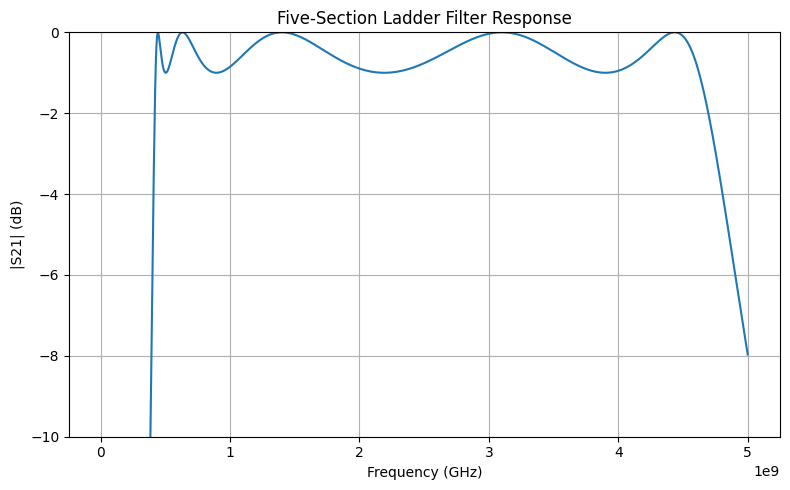

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import torch


import importlib
import sys
sys.path.append('../Functions/')
import electrical as EE
importlib.reload(EE)
import electrical_sim as EE_sim
importlib.reload(EE_sim)



myBP_2 = EE.generate_BP( filter_style="chebyshev", order=5, ripple_dB=1, freq_center=1.4e9, frac_BW=3, comp_var=np.nan )
print(myBP_2)



net = EE_sim.LadderS21().to("cuda")   # use "cpu" for CPU


# random LC values (batch of 32)
# p = torch.rand(1, 10, device="cpu") * 1e-9  # farads / henrys demo scale
p = myBP_2.elements_2_tensor().to("cuda")
print(p)


s21_dB = net(p)                                  # shape (32, 1000)

s21_db = s21_dB.to("cpu").numpy()


# Plot
freq = np.linspace(0, 5e9, 1000)
plt.figure(figsize=(8, 5))
plt.plot(freq, s21_db)
# plt.xlim(2.1e9, 2.7e9)
# plt.ylim(-60, 0)
plt.ylim(-10, 0)
plt.xlabel("Frequency (GHz)")
plt.ylabel("|S21| (dB)")
plt.title("Five-Section Ladder Filter Response")
plt.grid(True)
plt.tight_layout()

